In [1]:
#DS Basics
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt

#SKLearn Stuff

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

from sklearn.tree import plot_tree

#helpers
%matplotlib inline

In [2]:
data = pd.read_csv('Demographic_Data.csv')
data_model_age = pd.read_csv('Demographic_Data.csv')
data_model_region = pd.read_csv('Demographic_Data.csv')
data_model_items = pd.read_csv('Demographic_Data.csv')
data_model_instore = pd.read_csv('Demographic_Data.csv')
data_model_amount = pd.read_csv('Demographic_Data.csv')

In [3]:
data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


In [4]:
data_model_age.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


In [5]:
header = data.dtypes.index
print(header)

Index(['in-store', 'age', 'items', 'amount', 'region'], dtype='object')


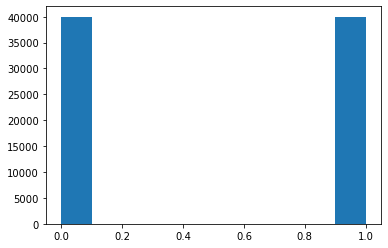

In [6]:
plt.hist(data['in-store'])
plt.show()

(array([40000.,     0.,     0., 40000.]),
 array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
 <BarContainer object of 4 artists>)

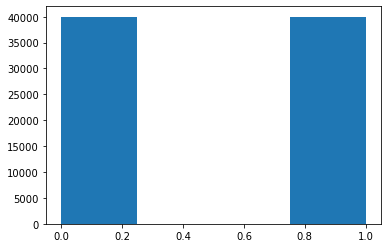

In [7]:
plt.hist(data['in-store'], bins=4)

In [8]:
import numpy as np

In [9]:
# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

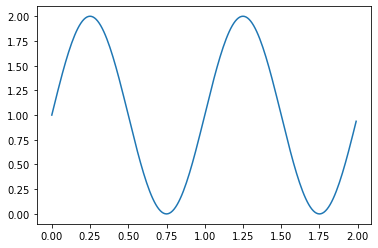

In [10]:
fig, ax = plt.subplots()
ax.plot(t, s)
plt.show()

In [11]:
#test
data_sample = data.sample(100)

In [12]:
x = data_sample['region']
y = data_sample['amount']

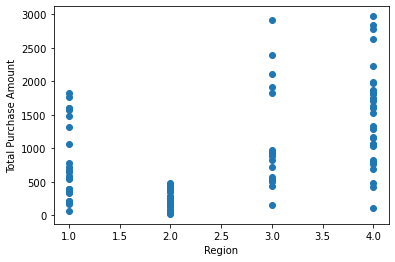

In [13]:
plt.scatter(x,y, marker='o')
plt.xlabel("Region") #x label
plt.ylabel("Total Purchase Amount") #y label
plt.show()

#Visual plot of sales by region

In [14]:
x = data_sample['items']
y = data_sample['amount']

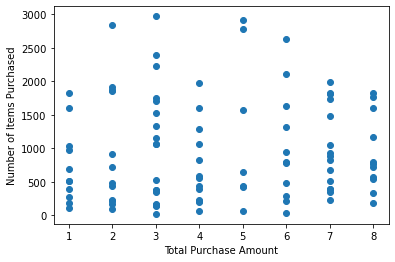

In [15]:
plt.scatter(x,y, marker='o')
#labels
plt.xlabel("Total Purchase Amount") #x label
plt.ylabel("Number of Items Purchased") #y label
plt.show()

#Visual plot of sale amount of items purchased

In [16]:
#box plot test

header = data.dtypes.index
print(header)

Index(['in-store', 'age', 'items', 'amount', 'region'], dtype='object')


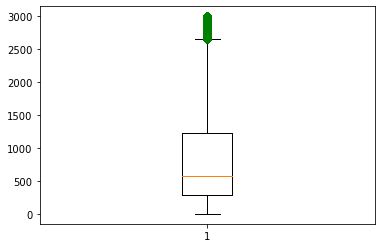

In [17]:
A = data['amount']
plt.boxplot(A,0,'gD')
plt.show()

In [18]:
#Correlation

corr_mat = data.corr()
print(corr_mat)

#the relationship between 'age' and 'amount' has little to no correlation

          in-store       age     items    amount    region
in-store  1.000000 -0.178256 -0.003954 -0.085474 -0.133114
age      -0.178256  1.000000  0.000679 -0.282089 -0.235446
items    -0.003954  0.000679  1.000000  0.000367 -0.001925
amount   -0.085474 -0.282089  0.000367  1.000000  0.403504
region   -0.133114 -0.235446 -0.001925  0.403504  1.000000


In [19]:
#Covariance

cov_mat = data.cov()
print(cov_mat)

#Region and Amount has a very strong covariance

           in-store          age     items         amount      region
in-store   0.250003    -1.400718 -0.004075     -30.825404   -0.074988
age       -1.400718   246.982562  0.021980   -3197.566591   -4.168901
items     -0.004075     0.021980  4.248703       0.545629   -0.004471
amount   -30.825404 -3197.566591  0.545629  520235.802331  327.903000
region    -0.074988    -4.168901 -0.004471     327.903000    1.269391


In [20]:
data.describe()

#There are 80,000 total sales
#half of the purchases were online/in-store
#the average customer age is nearly 46
#most purchases are for 835.92 and in the South / West

,in-store,age,items,amount,region
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,0.500000,45.757925,4.504975,835.919670,2.675000
std,0.500003,15.715679,2.061238,721.273736,1.126672
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.140000,2.000000
50%,0.500000,45.000000,4.000000,582.315000,3.000000
75%,1.000000,56.000000,6.000000,1233.700000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


In [22]:
data = data.drop_duplicates()

#are there duplicate rows?

In [23]:
print(data.isnull().sum())

#are there any missing values?

in-store    0
age         0
items       0
amount      0
region      0
dtype: int64


In [24]:
data.dtypes

#Check that all datatypes are numeric...they are

in-store      int64
age           int64
items         int64
amount      float64
region        int64
dtype: object

In [25]:
data.count()

in-store    79979
age         79979
items       79979
amount      79979
region      79979
dtype: int64

In [26]:
data.quantile()

in-store      1.00
age          45.00
items         4.00
amount      582.14
region        3.00
Name: 0.5, dtype: float64

In [27]:
freq = data.groupby('region').count()
print(freq)

        in-store    age  items  amount
region                                
1          15997  15997  15997   15997
2          19994  19994  19994   19994
3          18000  18000  18000   18000
4          25988  25988  25988   25988


In [28]:
freq = data.groupby('age').count()
print(freq)

     in-store  items  amount  region
age                                 
18        223    223     223     223
19        743    743     743     743
20       1009   1009    1009    1009
21        937    937     937     937
22        975    975     975     975
..        ...    ...     ...     ...
81        371    371     371     371
82        385    385     385     385
83        380    380     380     380
84        373    373     373     373
85        185    185     185     185

[68 rows x 4 columns]


In [29]:
freq = data.groupby('items').count()
print(freq)

       in-store    age  amount  region
items                                 
1          5699   5699    5699    5699
2         11284  11284   11284   11284
3         11486  11486   11486   11486
4         11594  11594   11594   11594
5         11233  11233   11233   11233
6         11519  11519   11519   11519
7         11376  11376   11376   11376
8          5788   5788    5788    5788


In [30]:
freq = data.groupby('in-store').count()
print(freq)

#Used Groupby to see how many online and in-store sales are present

            age  items  amount  region
in-store                              
0         39989  39989   39989   39989
1         39990  39990   39990   39990


In [31]:
freq = data.groupby('in-store').sum()
print(freq)

#Used Groupby to find the total amount sold in-store and online
#Online purchases   - $35,891,990
#In-store purchases - $30,956,520

              age   items        amount  region
in-store                                       
0         1941812  180477  3.589199e+07  112967
1         1717908  179839  3.095652e+07  100970


In [32]:
freq = data.groupby('items').sum()
print(freq)

#Used Groupby to find sum of amount by amount of items purchased
#1 - $4,703,965
#2 - $9,557,061
#3 - $9,609,120
#4 - $9,618,610
#5 - $9,368,027
#6 - $9,622,197
#7 - $9,442,385
#8 - $4,927,143

       in-store     age        amount  region
items                                        
1          2859  261974  4.703965e+06   15334
2          5605  515959  9.557061e+06   30241
3          5799  523515  9.609120e+06   30795
4          5820  529982  9.618610e+06   30749
5          5668  514120  9.368027e+06   30095
6          5798  528921  9.622197e+06   30707
7          5563  521258  9.442385e+06   30581
8          2878  263991  4.927143e+06   15435


In [33]:
data.groupby(["region"]).sum().sort_values("amount", ascending=False)
#Find total spent by each region
#1 - 11,922,580/16000 = $745.16
#2 - 5,042,184/20000  = $252.11
#3 - 16,523,450/18000 = $917.97
#4 - 33,385,350/26000 = $1284.05

,in-store,age,items,amount
region,,,,
4,12994,1007098,117044,3.336699e+07
3,10999,821645,80892,1.652345e+07
1,15997,699135,72151,1.191762e+07
2,0,1131842,90229,5.040442e+06


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79979 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  79979 non-null  int64  
 1   age       79979 non-null  int64  
 2   items     79979 non-null  int64  
 3   amount    79979 non-null  float64
 4   region    79979 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.7 MB


In [35]:
###################Begin Task 2######################

In [36]:
#Array for slicing features
age_array = ([1, 9, 19, 29, 39, 49, 59, 69, 79, 89])
age_array

[1, 9, 19, 29, 39, 49, 59, 69, 79, 89]

In [37]:
#Array for slicing features
instore_array = ([0, 1])
instore_array

[0, 1]

In [38]:
#Array for slicing features
amount_array = ([1, 500, 1000, 1500, 2000, 2500, 3000, 3500])
amount_array

[1, 500, 1000, 1500, 2000, 2500, 3000, 3500]

In [39]:
#Array for slicing features
items_array = ([1, 2, 3, 4, 5, 6, 7, 8])
items_array

[1, 2, 3, 4, 5, 6, 7, 8]

In [40]:
#Array for slicing features
region_array = ([1, 2, 3, 4])
region_array

[1, 2, 3, 4]

In [41]:
#pandas to cut for Age
data_model_age['age_categorized'] = pd.cut(data_model_age['age'], 5, labels=False, precision=0)
data_model_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   in-store         80000 non-null  int64  
 1   age              80000 non-null  int64  
 2   items            80000 non-null  int64  
 3   amount           80000 non-null  float64
 4   region           80000 non-null  int64  
 5   age_categorized  80000 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 3.7 MB


In [42]:
#pandas to cut for Region
data_model_region['region_categorized'] = pd.cut(data_model_region['region'], region_array, labels=False, precision=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79979 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  79979 non-null  int64  
 1   age       79979 non-null  int64  
 2   items     79979 non-null  int64  
 3   amount    79979 non-null  float64
 4   region    79979 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.7 MB


In [43]:
#pandas to cut for Items
data_model_items['items_categorized'] = pd.cut(data_model_items['items'], items_array, labels=False, precision=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79979 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  79979 non-null  int64  
 1   age       79979 non-null  int64  
 2   items     79979 non-null  int64  
 3   amount    79979 non-null  float64
 4   region    79979 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.7 MB


In [44]:
#pandas to cut for In-store
data_model_instore['instore_categorized'] = pd.qcut(data_model_instore['in-store'], instore_array, labels=False, precision=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79979 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  79979 non-null  int64  
 1   age       79979 non-null  int64  
 2   items     79979 non-null  int64  
 3   amount    79979 non-null  float64
 4   region    79979 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.7 MB


In [45]:
#pandas to cut for Amount
data_model_amount['amount_categorized'] = pd.cut(data_model_amount['amount'], amount_array, labels=False, precision=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79979 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  79979 non-null  int64  
 1   age       79979 non-null  int64  
 2   items     79979 non-null  int64  
 3   amount    79979 non-null  float64
 4   region    79979 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.7 MB


In [46]:
#features for Age
X_age = data_model_age[['in-store', 'region', 'items', 'amount']]
print('Summary of feature sample')
X_age.head()

Summary of feature sample


,in-store,region,items,amount
0,0,2,4,281.03
1,0,2,2,219.51
2,1,4,3,1525.70
3,1,3,3,715.25
4,1,1,4,1937.50


In [47]:
#features for Region
X_region = data_model_region[['in-store', 'age', 'items', 'amount']]
print('Summary of feature sample')
X_region.head()

Summary of feature sample


,in-store,age,items,amount
0,0,37,4,281.03
1,0,35,2,219.51
2,1,45,3,1525.70
3,1,46,3,715.25
4,1,33,4,1937.50


In [48]:
#features for Items
X_items = data_model_items[['in-store', 'age', 'region', 'amount']]
print('Summary of feature sample')
X_items.head()

Summary of feature sample


,in-store,age,region,amount
0,0,37,2,281.03
1,0,35,2,219.51
2,1,45,4,1525.70
3,1,46,3,715.25
4,1,33,1,1937.50


In [49]:
#features for In-store
X_instore = data_model_instore[['region', 'age']]
print('Summary of feature sample')
X_instore.head()

Summary of feature sample


,region,age
0,2,37
1,2,35
2,4,45
3,3,46
4,1,33


In [50]:
#features for Amount
X_amount = data_model_amount[['in-store', 'age', 'items', 'region']]
print('Summary of feature sample')
X_amount.head()

Summary of feature sample


,in-store,age,items,region
0,0,37,4,2
1,0,35,2,2
2,1,45,3,4
3,1,46,3,3
4,1,33,4,1


In [51]:
#dependent variable for Age
y_age = data_model_age['age_categorized']
y_age.head(3)

0    1
1    1
2    2
Name: age_categorized, dtype: int64

In [52]:
#dependent variable for Region
y_region = data_model_region['region']
y_region.head()

0    2
1    2
2    4
3    3
4    1
Name: region, dtype: int64

In [53]:
#dependent variable for Items
y_items = data_model_items['items']
y_items.head()

0    4
1    2
2    3
3    3
4    4
Name: items, dtype: int64

In [54]:
#dependent variable for In-store
y_instore = data_model_instore['in-store']
y_instore.head()

0    0
1    0
2    1
3    1
4    1
Name: in-store, dtype: int64

In [55]:
#dependent variable for Amount
y_amount = data_model_amount['amount']
y_amount.head()

0     281.03
1     219.51
2    1525.70
3     715.25
4    1937.50
Name: amount, dtype: float64

In [56]:
#Train/Test Split for Age
X_age_train, X_age_test, y_age_train, y_age_test = train_test_split(X_age, y_age, test_size = .30, random_state = 123)

In [57]:
#Train/Test Split for Region
X_region_train, X_region_test, y_region_train, y_region_test = train_test_split(X_region, y_region, test_size = .30, random_state = 123)

In [58]:
#Train/Test Split for Items
X_items_train, X_items_test, y_items_train, y_items_test = train_test_split(X_items, y_items, test_size = .30, random_state = 123)

In [59]:
#Train/Test Split for In-store
X_instore_train, X_instore_test, y_instore_train, y_instore_test = train_test_split(X_instore, y_instore, test_size = .30, random_state = 123)

In [60]:
#Train/Test Split for Amount
X_amount_train, X_amount_test, y_amount_train, y_amount_test = train_test_split(X_amount, y_amount, test_size = .30, random_state = 123)

In [61]:
#Modeling (Classification) for Age
dct_algo_age = DecisionTreeClassifier()
model_age = dct_algo_age.fit(X_age_train,y_age_train)

In [62]:
#Modeling (Classification) for Region
dct_algo_region = DecisionTreeClassifier()
model_region = dct_algo_region.fit(X_region_train,y_region_train)

In [63]:
#Modeling (Classification) for Items
dct_algo_items = DecisionTreeClassifier()
model_items = dct_algo_items.fit(X_items_train,y_items_train)

In [64]:
#Modeling (Classification) for In-store
dct_algo_instore = DecisionTreeClassifier()
model_instore = dct_algo_instore.fit(X_instore_train,y_instore_train)

In [65]:
#Modeling (Classification) for Amount
#dct_algo_amount = DecisionTreeClassifier()
#model_amount = dct_algo_amount.fit(X_amount_train,y_amount_train)

##Requires using a Regression model, as type is float64

In [66]:
#Predictions for Age
preds_age = model_age.predict(X_age_test)

In [67]:
#Predictions for Region
preds_region = model_region.predict(X_region_test)

In [68]:
#Predictions for Items
preds_items = model_items.predict(X_items_test)

In [69]:
#Predictions for In-store
preds_instore = model_instore.predict(X_instore_test)

In [70]:
#Predictions for Amount
#preds_amount = model_amount.predict(X_amount_test)

In [71]:
#Print Age
print(classification_report(y_age_test, preds_age))

              precision    recall  f1-score   support

           0       0.27      0.27      0.27      5150
           1       0.30      0.30      0.30      6954
           2       0.29      0.29      0.29      6710
           3       0.20      0.20      0.20      3494
           4       0.20      0.20      0.20      1692

    accuracy                           0.27     24000
   macro avg       0.25      0.25      0.25     24000
weighted avg       0.27      0.27      0.27     24000



In [72]:
#Print Region
print(classification_report(y_region_test, preds_region))

              precision    recall  f1-score   support

           1       0.39      0.39      0.39      4857
           2       0.91      0.90      0.90      5945
           3       0.37      0.38      0.38      5389
           4       0.54      0.53      0.53      7809

    accuracy                           0.56     24000
   macro avg       0.55      0.55      0.55     24000
weighted avg       0.56      0.56      0.56     24000



In [73]:
#Print Items
print(classification_report(y_items_test, preds_items))

              precision    recall  f1-score   support

           1       0.07      0.07      0.07      1721
           2       0.14      0.14      0.14      3453
           3       0.14      0.14      0.14      3446
           4       0.14      0.14      0.14      3537
           5       0.13      0.14      0.14      3337
           6       0.14      0.15      0.14      3360
           7       0.14      0.14      0.14      3405
           8       0.08      0.08      0.08      1741

    accuracy                           0.13     24000
   macro avg       0.13      0.13      0.13     24000
weighted avg       0.13      0.13      0.13     24000



In [74]:
#Print In-store
print(classification_report(y_instore_test, preds_instore))

              precision    recall  f1-score   support

           0       0.98      0.60      0.74     11831
           1       0.72      0.99      0.83     12169

    accuracy                           0.80     24000
   macro avg       0.85      0.79      0.79     24000
weighted avg       0.85      0.80      0.79     24000



In [75]:
#Print Amount
#print(classification_report(y_amount_test, preds_amount))

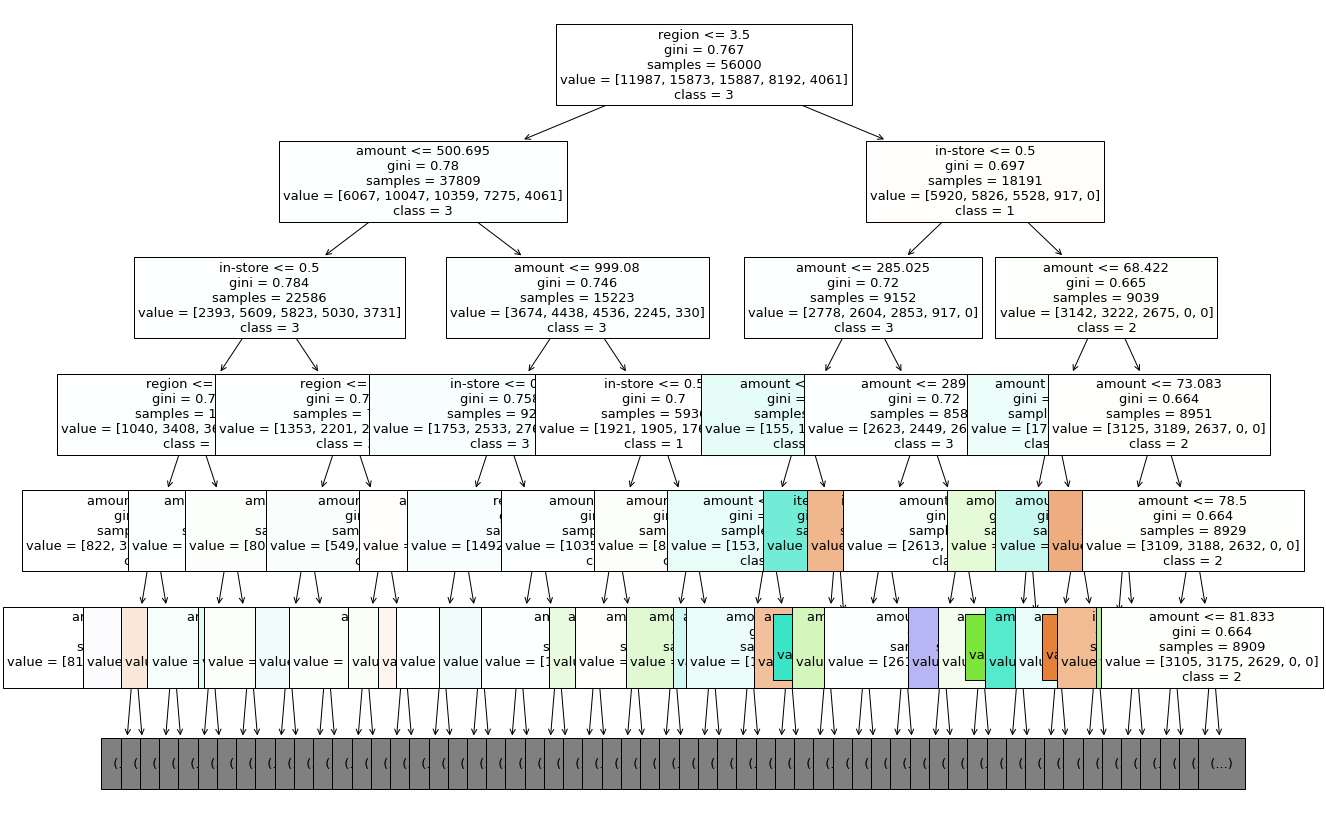

In [76]:
#DCT for Age
fig_age = plt.figure(figsize=(20,15))
tree_age = plot_tree(model_age, feature_names=X_age.columns,class_names=['1', '2', '3', '4', '5'], filled=True, max_depth=5, fontsize = 13)
plt.show()

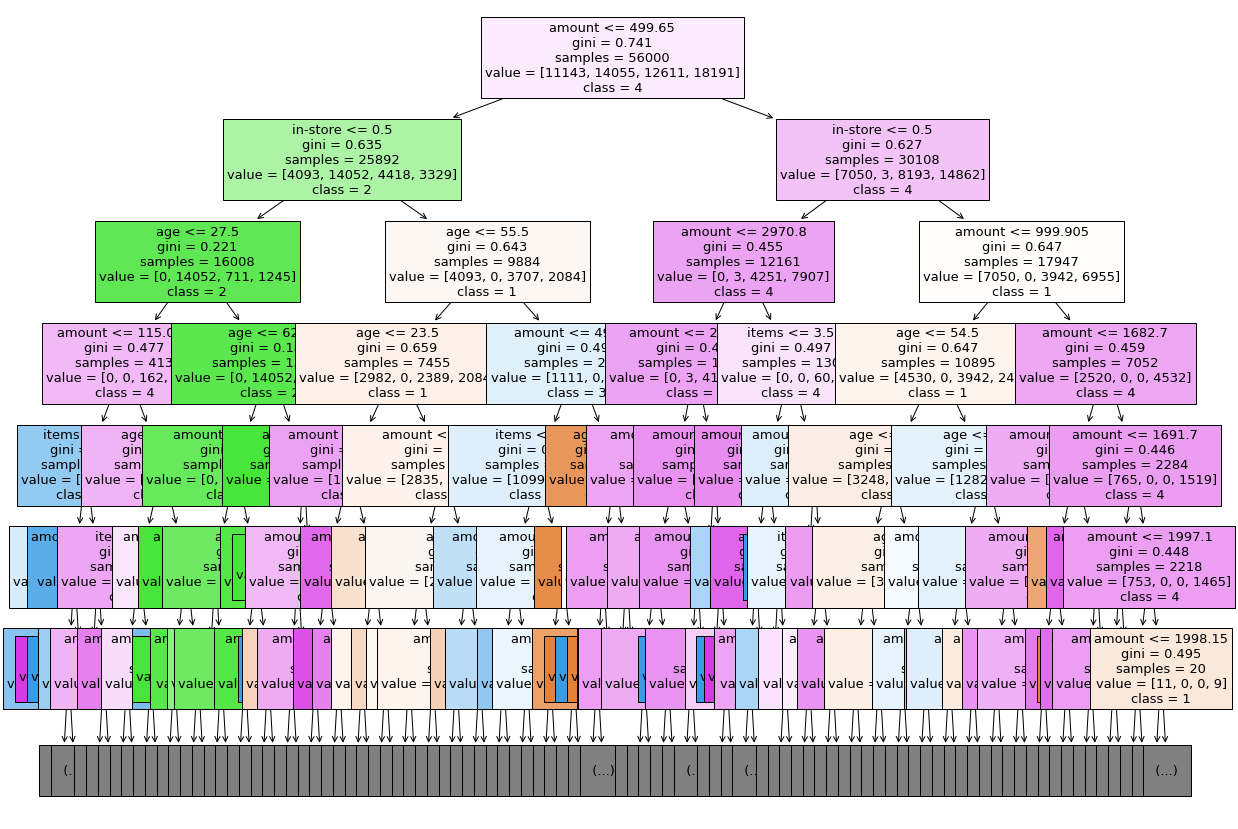

In [77]:
#DCT for Region
fig_region = plt.figure(figsize=(20,15))
tree_region = plot_tree(model_region, feature_names=X_region.columns,class_names=['1', '2', '3', '4'], filled=True, max_depth=6, fontsize = 13)
plt.show()

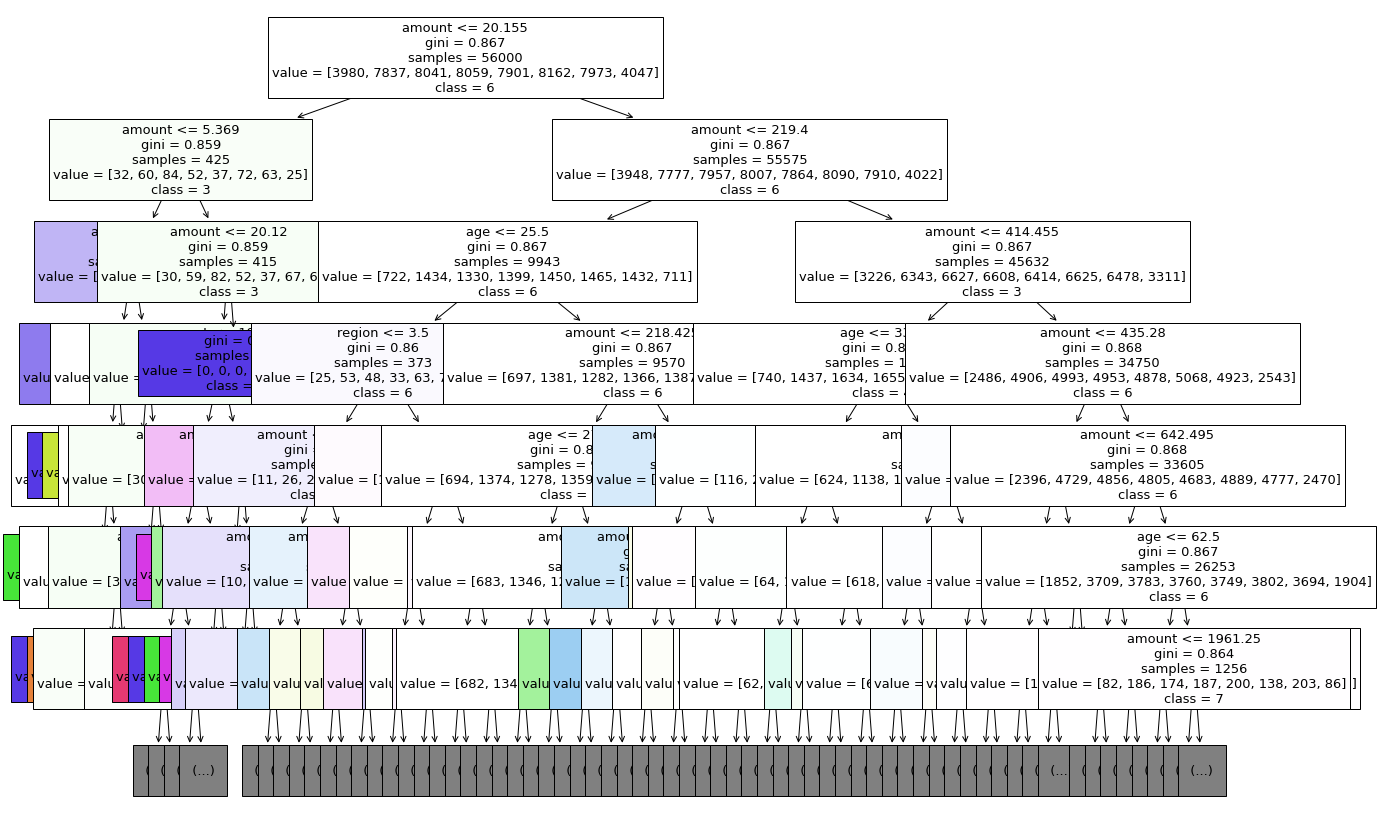

In [78]:
#DCT for Items
fig_items = plt.figure(figsize=(20,15))
tree_items = plot_tree(model_items, feature_names=X_items.columns,class_names=['1', '2', '3', '4', '5', '6', '7', '8'], filled=True, max_depth=6, fontsize = 13)
plt.show()

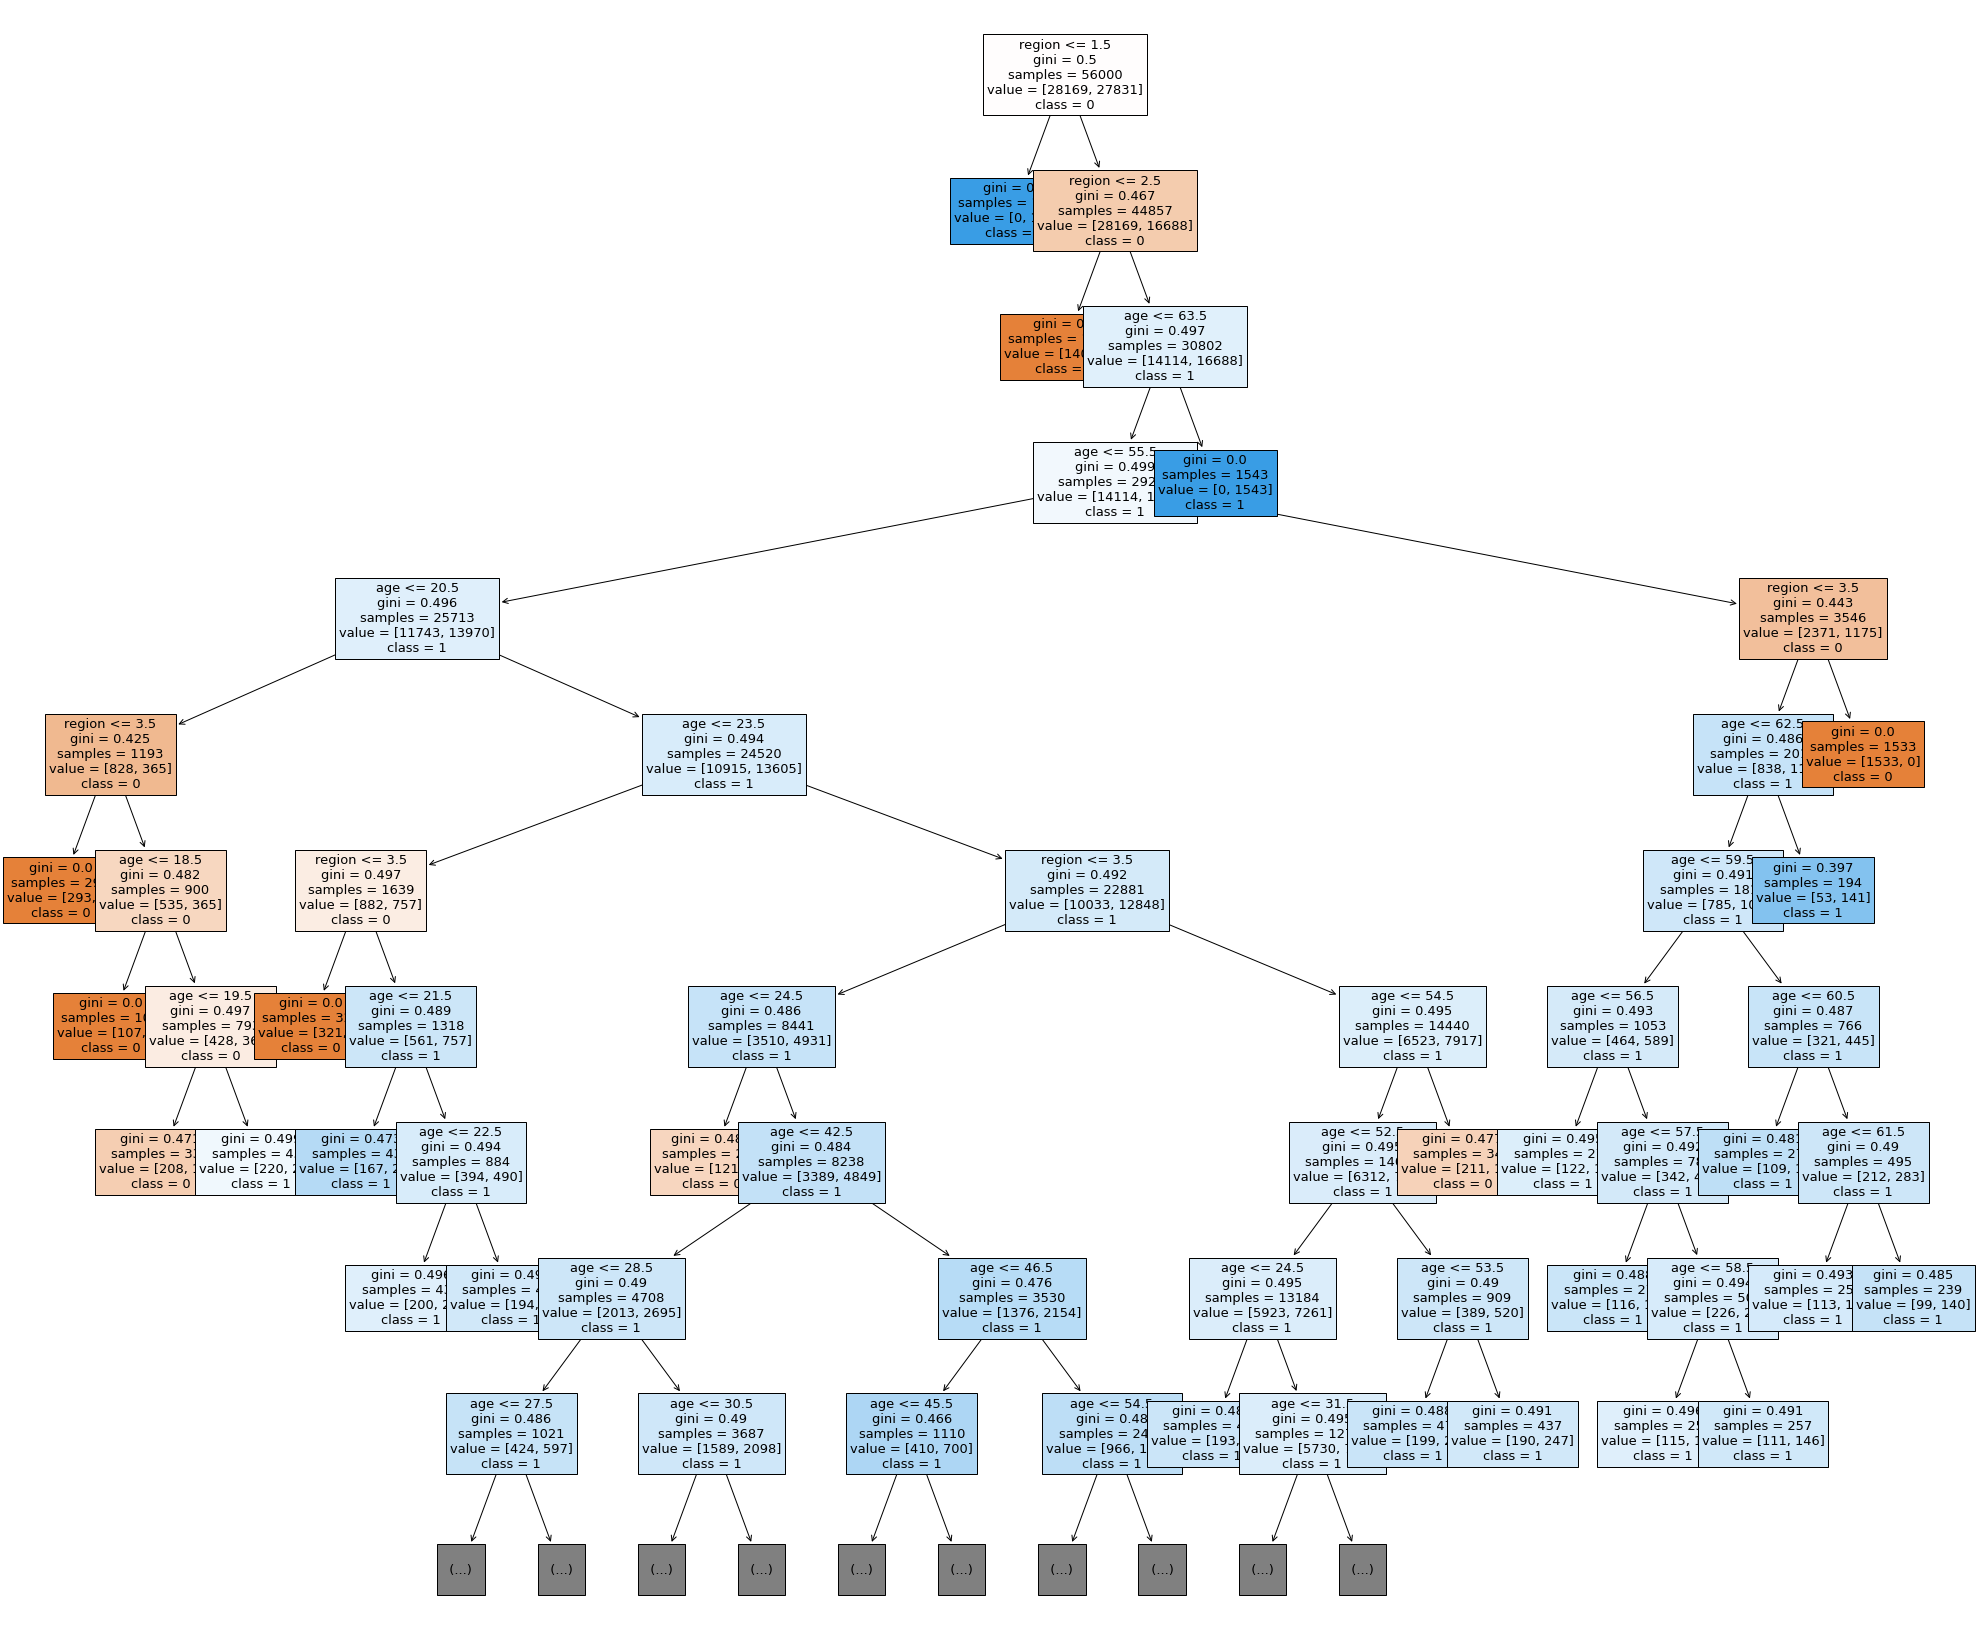

In [79]:
#DCT for In-store
fig_instore = plt.figure(figsize=(35,30))
tree_instore = plot_tree(model_instore, feature_names=X_instore.columns,class_names=['0', '1'], filled=True, max_depth=10, fontsize = 13)
plt.show()

In [80]:
#DCT for Amount
#fig_amount = plt.figure(figsize=(20,15))
#tree_amount = plot_tree(model_amount, feature_names=X_amount.columns,class_names=['1', '500', '1000', '1500', '2000', '2500', '3000', '3500'], filled=True, max_depth=6, fontsize = 13)
#plt.show()

In [81]:
#cross_val_score for Age
model_age = DecisionTreeClassifier(max_depth=10)

In [82]:
#cross_val_score for Region
model_region = DecisionTreeClassifier(max_depth=10)

In [83]:
#cross_val_score for Items
model_items = DecisionTreeClassifier(max_depth=10)

In [84]:
#cross_val_score for In-store
model_instore = DecisionTreeClassifier(max_depth=10)

In [85]:
#cross_val_score for Amount
#model_amount = DecisionTreeClassifier(max_depth=10)

In [86]:
#Age
print(cross_val_score(model_age, X_age, y_age, cv=2))

[0.291075 0.294925]


In [87]:
#Region
print(cross_val_score(model_region, X_region, y_region, cv=2))

[0.635775 0.63875 ]


In [88]:
#Items
print(cross_val_score(model_items, X_items, y_items, cv=2))

[0.144575 0.14375 ]


In [89]:
#In-store
print(cross_val_score(model_instore, X_instore, y_instore, cv=2))

[0.7904   0.794475]


In [90]:
#Amount
#print(cross_val_score(model_amount, X_amount, y_amount, cv=2))

In [91]:
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))

In [92]:
#classification for Age
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model_age, X_age,y_age, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)

In [93]:
for i in range(len(names)):
    print(names[i], results[i].mean())

Random Forest Classifier 0.2924875180603781
Decision Tree Classifier 0.2925500191541613


In [94]:
#classification for Region
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model_region, X_region,y_region, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)

In [95]:
for i in range(len(names)):
    print(names[i], results[i].mean())

Random Forest Classifier 0.6374625203557115
Decision Tree Classifier 0.6374000206681959


In [96]:
#classification for Items
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model_items, X_items,y_items, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)

In [97]:
for i in range(len(names)):
    print(names[i], results[i].mean())

Random Forest Classifier 0.14437500379516463
Decision Tree Classifier 0.14436250254514507


In [98]:
#classification for In-store
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model_instore, X_instore,y_instore, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)

In [99]:
for i in range(len(names)):
    print(names[i], results[i].mean())

Random Forest Classifier 0.792750015247925
Decision Tree Classifier 0.792750015247925


In [100]:
#classification for Amount
#results = []
#names = []
#for name, model in algos_Class:
#    result = cross_val_score(model_amount, X_amount,y_amount, cv=3, scoring='accuracy')
#    names.append(name)
#    results.append(result)

In [101]:
#for i in range(len(names)):
#    print(names[i], results[i].mean())